This notebook contains demo codes for Lecture 6 on computing discrete wavelet transforms and multi-resolution analyses. 

**Note that we will be using the Python package *PyWavelets* which you may have to install**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt 
from copy import deepcopy

# same function from Lec 4

def f(x):
  val = 0.75*( (3*np.sin(2*x) + 0.5*np.tanh(0.5*(x-3)) + 0.2*np.exp(-(x- 4)**2)
  + 1.5*np.sin(5*x) + 4*np.cos(3*(x-6)**2))/10 + (x/20)**3 ) + np.cos(np.pi*x) + 4*np.exp( - ( (x - 7)/0.05)**2)

  return val


L = 12
N_grid = 2**10

grid = np.linspace(0, L, N_grid+1)
grid = grid[0:N_grid]

f_vals = f(grid)

# plotting f

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(grid, f_vals)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)


ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('f(t)', fontsize=18)

plt.show()

We now compute the discrete wavelet transform of this function. 

Text(0.5, 0, 't')

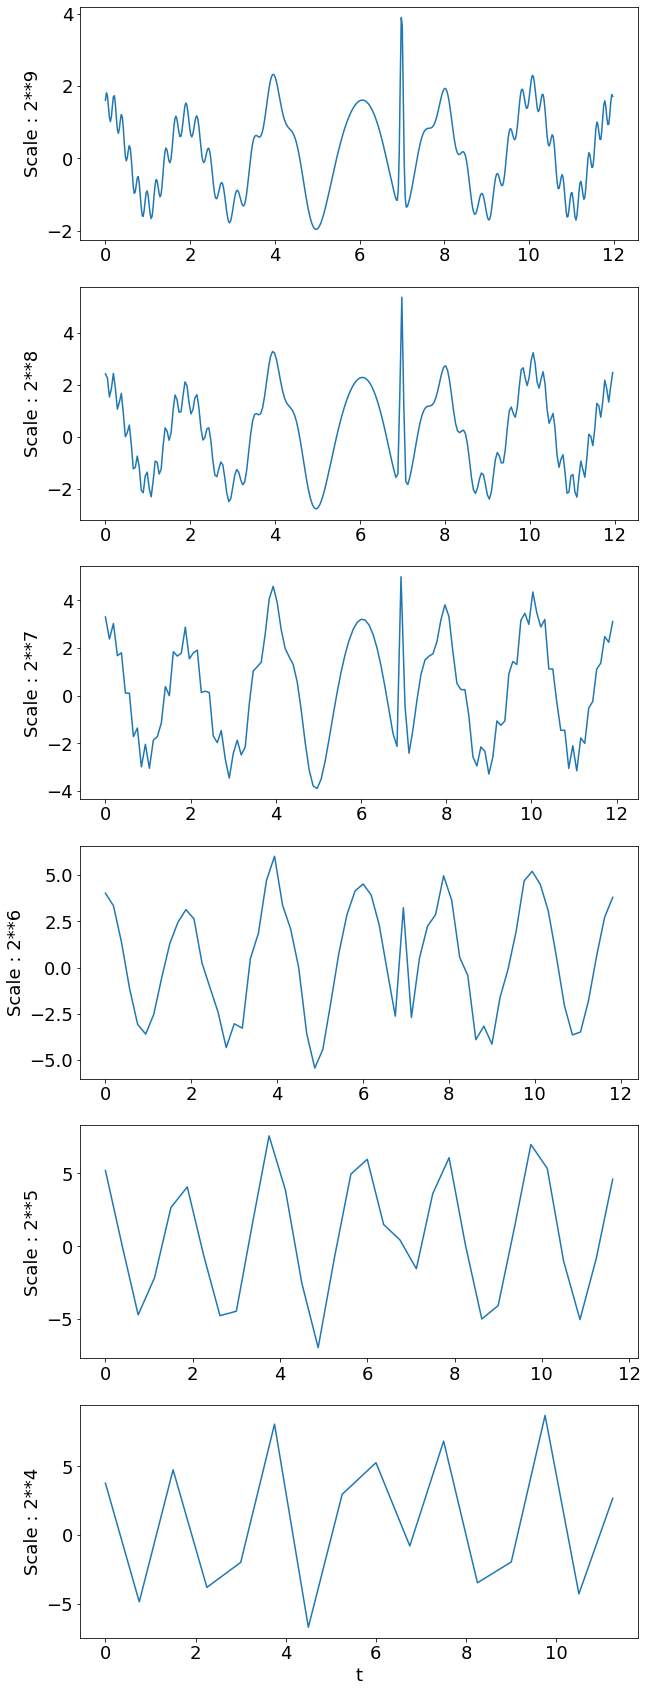

In [6]:
n_scales = 6

f_prev_scale = f_vals
f_next_scale = f_vals

new_grid = grid

fig, ax = plt.subplots(n_scales, 1, figsize=(10, n_scales*5))

for i in range(n_scales):

  f_prev_scale = f_next_scale

  f_next_scale, wf = pywt.dwt( f_prev_scale, wavelet = 'haar'  )

  new_grid = new_grid[0::2]

  ax[i].plot(new_grid, f_next_scale)

  ax[i].tick_params(axis='x', labelsize=18)
  ax[i].tick_params(axis='y', labelsize=18)

  ax[i].set_ylabel('Scale : 2**' + str(int(np.log2(N_grid)-i-1)) , fontsize= 18)
  
ax[n_scales-1].set_xlabel('t', fontsize= 18)


Text(0.5, 0, 't')

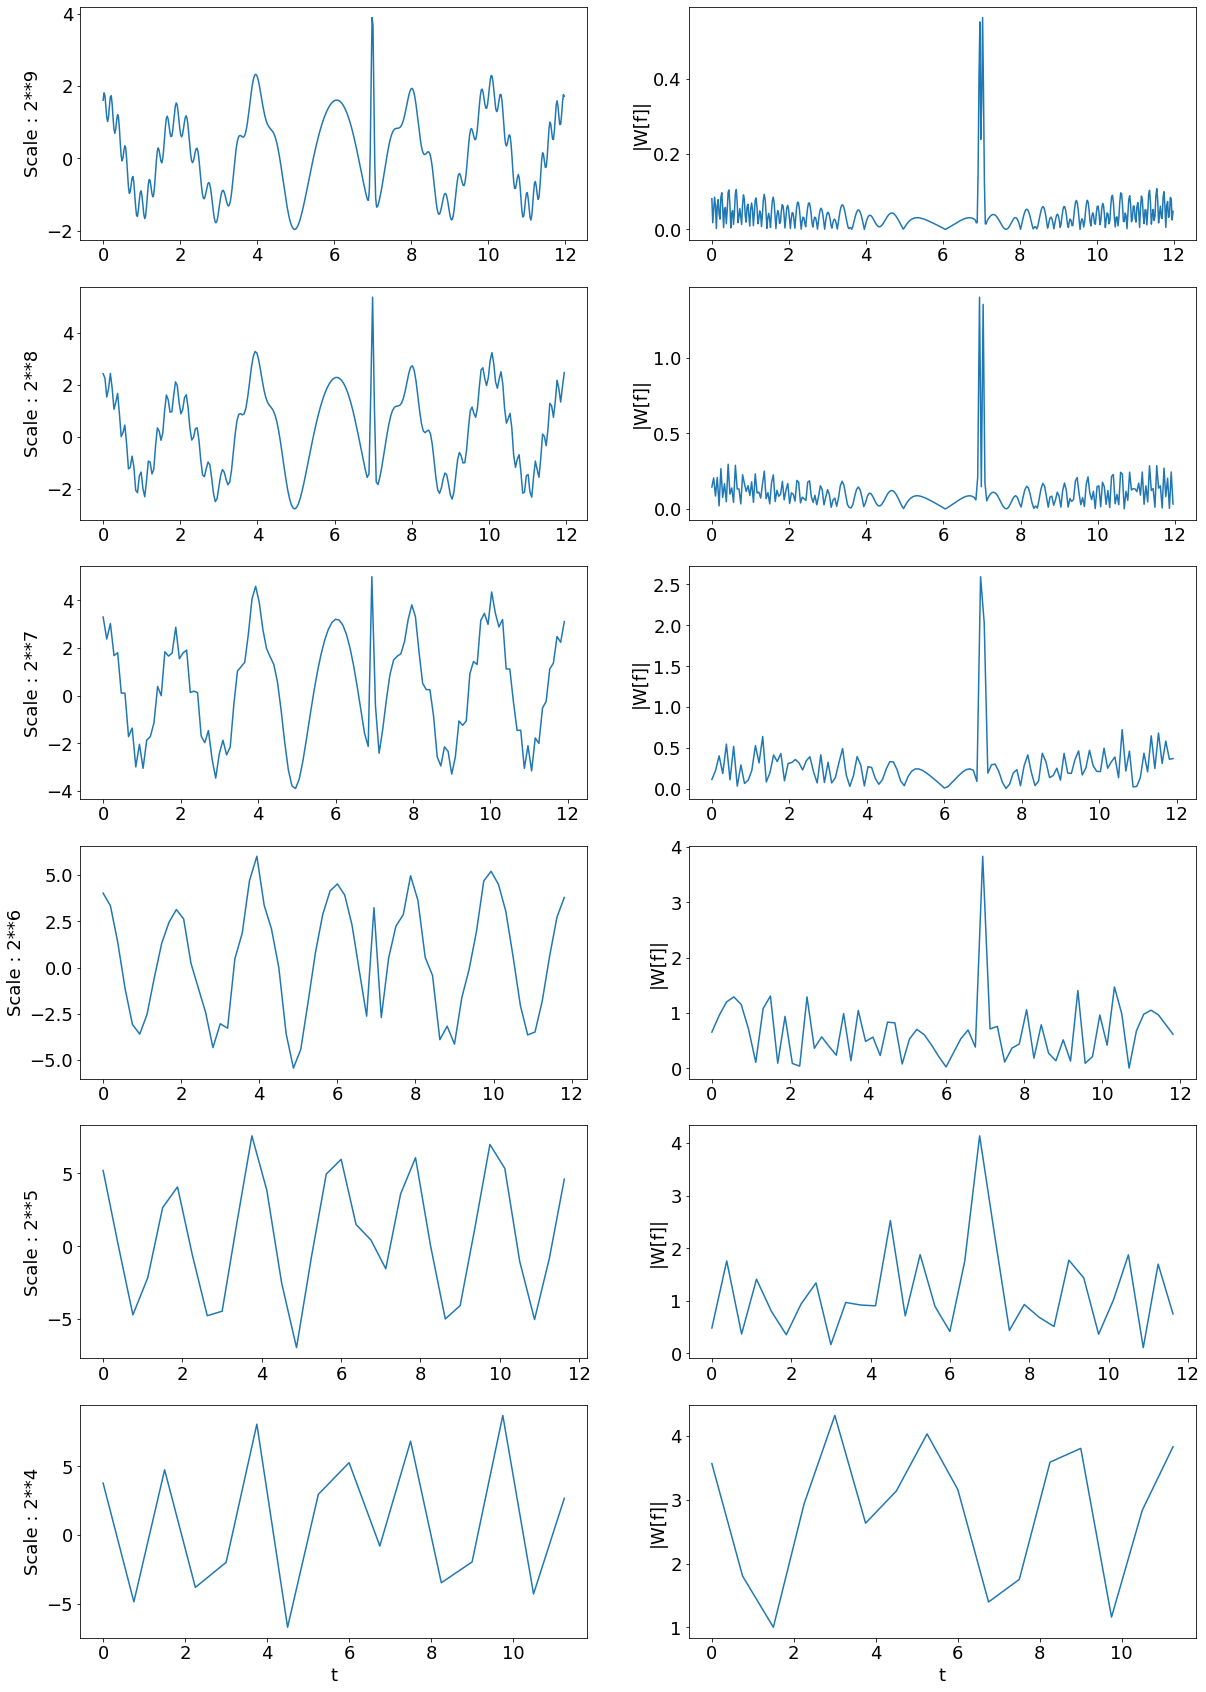

In [94]:
n_scales = 6

f_prev_scale = f_vals
f_next_scale = f_vals

new_grid = grid

fig, ax = plt.subplots(n_scales, 2, figsize=(20, n_scales*5))

for i in range(n_scales):

  f_prev_scale = f_next_scale

  f_next_scale, wf = pywt.dwt( f_prev_scale, wavelet = 'haar'  )

  new_grid = new_grid[0::2]

  ax[i][0].plot(new_grid, f_next_scale)

  ax[i][0].tick_params(axis='x', labelsize=18)
  ax[i][0].tick_params(axis='y', labelsize=18)

  ax[i][0].set_ylabel('Scale : 2**' + str(int(np.log2(N_grid)-i-1)) , fontsize= 18)

  ax[i][1].plot(new_grid, np.abs(wf))
  ax[i][1].tick_params(axis='x', labelsize=18)
  ax[i][1].tick_params(axis='y', labelsize=18)

  ax[i][1].set_ylabel('|W[f]|', fontsize=18)

  
ax[n_scales-1][0].set_xlabel('t', fontsize= 18)
ax[n_scales-1][1].set_xlabel('t', fontsize= 18)
